<a href="https://colab.research.google.com/github/SohyunKimmm/SohyunKimmm/blob/main/230105_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%ED%95%A0%2C%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D%2C%EA%B7%B8%EB%A6%AC%EB%93%9C%EC%84%9C%EC%B9%98%26230106_%EB%B3%80%EC%88%98%EC%84%A0%ED%83%9D%2C%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B0%B8%EB%9F%B0%EC%8B%B1%2C%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#230105
#머신러닝

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split  #'train_test_split': train set과 test set을 나누어줌
from sklearn.model_selection import cross_val_score  #'sklearn'(사이킷런): 머신러닝에서 자주 활용하는 패키지
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Ashopping.csv", encoding = "cp949")
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
#결측값 확인
df.isnull()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#필요 열(=변수, feature)만 뽑아서 데이터 만들기
X = df[["총매출액", "1회 평균매출액", "할인권 사용 횟수"]]
Y = df[["평균 구매주기"]] #'평균구매주기': 연속형(숫자)자료 => '회귀모형'

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0) #'test_size': test set의 비율(30%) -> train set= 70%

#model만들기
model = KNeighborsRegressor()  #y('평균구매주기')가 연속형(숫자)자료이기 때문에 '회귀(Regressor)모형' 사용

#교차검증(CV; Cross Validation)
#목적: 예측값(y햇)과 실제값(y)의 차이를 줄여나가기 위해; '모델의 성능 향상'
#폴드를 k개로 나누어 모델을 학습시켜 정확도를 측정
score = cross_val_score(model, X_train, Y_train, cv = 10)  #'cv=10': train set 내부가 10번으로 나누어져서(쪼개져서) 교차검증
print("교차검증 점수 :", score)


교차검증 점수 : [0.71641358 0.55975791 0.76634495 0.58696302 0.60491788 0.64888287
 0.73366212 0.53759107 0.74664738 0.79547413]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

#필요 열(=변수, feature)만 뽑아서 데이터 만들기
X = df[["총매출액", "거래기간", "방문빈도"]]
Y = df[["이탈여부"]] #'이탈여부': 이산형(집단)자료 => '분류모형'

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#모형생성
model = KNeighborsClassifier() #y('이탈여부')가 이산형(집단)자료이기 때문에 '분류(Classifier)모형' 사용

#검증(Stratified K-fold Cross-Validation Test)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
scores = cross_val_score(model, X_train, Y_train, cv = skf)
print("교차검증 점수 :", scores)

#적절한 CV(Cross Validation)값은 어떻게 구하는 것인가?
#=> '그리드 서치'

교차검증 점수 : [0.64285714 0.7        0.67857143 0.67142857 0.70714286]


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
from sklearn.model_selection import GridSearchCV

#필요 열(=변수, feature)만 뽑아서 데이터 만들기
X = df[["총매출액", "거래기간", "방문빈도"]]
Y = df[["이탈여부"]] 

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#모형생성
model = KNeighborsClassifier()

#그리드 인자 검색
mylist = list(range(1,50))
k_list = [x for x in mylist if x%2 != 0] #홀수만 k_list안에 넣어라(임의로 설정) / 짝수로도 가능; 'if x%2 == 0'
parameter_grid = {"n_neighbors": k_list} #딕셔너리 -> 키: 'n_neighbors', 값: k_list

#그리드 서치
grid_search = GridSearchCV(model, parameter_grid, cv = 10) 
grid_search.fit(X_train, Y_train)

grid_search.best_params_

#결과값: (홀수일 때) 최적CV = 9
#결과값: (짝수일 때) 최적CV = 22 
#넣는 값에 따라서 CV 달라짐. 옵션은 중첩될 수 있다? best가 best가 아닐수도 있다구..? 
#(CV뿐만 아니라 다른 요소들도) 머신러닝에서 완벽한 '정답'은 없음!🤖👾

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

{'n_neighbors': 9}

In [ ]:
#그리드 서치
#: 해당 CV일때 best parameter를 찾아주는 것(CV만 찾는 것 아님!); '중첩'
#best paramaeter은 모델(회귀/k최근점/의사결정나무 등)마다 다 다름
# -> 위에서 먼저 모형생성 했었음(회귀(Regressor/분류Classifier)

grid_search = GridSearchCV(model, parameter_grid, cv = 10)
grid_search.fit(X_train, Y_train)

grid_search.best_params_
grid_search.cv_results_

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

{'mean_fit_time': array([0.0044858 , 0.00336666, 0.00359893, 0.00545723, 0.00724151,
        0.00634217, 0.00542562, 0.0057132 , 0.00341046, 0.00343156,
        0.00378971, 0.00354326, 0.00327568, 0.0031503 , 0.00337021,
        0.003338  , 0.00380065, 0.00411282, 0.00338068, 0.0038651 ,
        0.00320885, 0.00327847, 0.00385027, 0.00324819, 0.00319667]),
 'std_fit_time': array([3.78179595e-03, 1.66164025e-04, 5.18410946e-04, 1.01006243e-03,
        2.88091405e-03, 2.14680012e-03, 5.22057733e-04, 2.43605550e-03,
        3.68569958e-04, 4.36968288e-04, 8.30238578e-04, 2.68632515e-04,
        2.92582882e-04, 1.03543685e-04, 3.58951409e-04, 3.07179411e-04,
        1.26822801e-03, 1.34866864e-03, 5.36828593e-04, 7.05530829e-04,
        8.75345266e-05, 2.44129599e-04, 8.06129410e-04, 1.09188705e-04,
        2.24468194e-04]),
 'mean_score_time': array([0.0040266 , 0.0041369 , 0.00416377, 0.00674293, 0.0090807 ,
        0.00811591, 0.00654426, 0.00669076, 0.00411994, 0.0043093 ,
        0.00

In [ ]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn.metrics import accuracy_score
be = grid_search.best_estimator_  
pred = be.predict(X_test)  #'y햇(예측값)'을 구하는 과정; X_test를 넣어서 예측
accuracy_score(Y_test, pred)  #Y_test= 실제값 / pred= X_test를  넣어서 예측한 값

#결과값
#위에서 cv=20일 때 accuracy=64, cv=15를 주었을 때는 68, cv=5일때는 다시 64가 나옴
#어떤 cv를 넣었을 때 높은 accuracy가 나오는지 하나씩 넣어보면서 찾아야함
#70~80%정도 수준일때 '과적합은 아니다' 라고 해석할 수 있음. (연구 목적에 맞게 정확도수준 설정)
#목적: Accuracy, F1-score을 높여가는 것
#머신러닝에서는 x값에 붙어있는 베타값추정 불가. 'feature importance;어떤 변수가 중요한가'를 추정가능

0.6433333333333333

#변수선택

In [ ]:
##통계기반

from sklearn.feature_selection import SelectKBest, chi2 #'feature'-> 독립변수 / 'SelectKBest'-> 카이제곱값으로 베스트를 선택해주는것

#데이터(변수) 지정
X = df.drop(["고객ID", "이탈여부"], axis=1) #고객ID, 이탈여부 데이터 열방향 제외
Y = df["이탈여부"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#일변량 통계기반
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

,Chi2,p-value,support,attribute
0,11.220487,8.525018e-04,True,총매출액
1,21.391230,4.462997e-06,True,구매금액대
2,40.530259,3.508018e-10,True,방문빈도
3,31.867994,2.401115e-08,True,1회 평균매출액
8,6.784768,9.389630e-03,True,클레임접수여부
11,12.171897,5.156069e-04,True,성별
13,60.680197,2.435210e-14,True,거래기간
14,86.354376,1.882930e-19,True,할인민감여부
16,6.449529,1.131399e-02,True,Frequency
18,23.103693,1.880588e-06,True,평균 구매주기


In [ ]:
#모형기반

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier #'ensemble': 다양한 모형을 모아서 분석 / 'RandomForest': decision tree를 여러개 만들어서 숲을 이루는 모형

selector = SelectFromModel(RandomForestClassifier(n_estimators= 100, random_state= 0), threshold = "median") 
#'n_estimators=100' -> 100개의 의사결정나무를 만들어서 베깅을 했다. 
#'threshold = median' -> 'threshold': 우리가 어디로(어느 성능으로) 갈지에 대한 '기준'; 성능을 높일지(오른쪽), 낮출지(왼쪽) / 'median'-> '중간값'부터 개선해 나갈것이다.
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support()
score[score["support"] == True]

,attribute,support
0,총매출액,True
2,방문빈도,True
3,1회 평균매출액,True
4,할인권 사용 횟수,True
5,총 할인 금액,True
10,거주지역,True
12,고객 나이대,True
13,거래기간,True
14,할인민감여부,True
18,평균 구매주기,True


#데이터 밸런싱
###오버샘플링, 언더샘플링

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
df.describe()

#'이탈여부'의 평균= 0.3 -> 1이 적고 0이 많을 것이라고 예측해보기

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [ ]:
#언더 샘플링

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state = 0).fit_resample(X_train, Y_train)
#'fit_resample()' -> 다시 뽑아서 X_train_under과 Y_train_under에 넣음. 두 변수의 인덱스가 동일해야하기 때문에 같이 뽑아야함. 
print("original data %s" %Counter(Y))
print("original train data %s" %Counter(Y_train))
print("under train data %s" %Counter(Y_train_under))

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
under train data Counter({0: 219, 1: 219})


In [ ]:
#오버 샘플링

from imblearn.over_sampling import SMOTE  #SMOTE: Synthtic Minority Oversampling Technique

X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" %Counter(Y))
print("original train data %s" %Counter(Y_train))
print("over train data %s" %Counter(Y_train_over))

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
over train data Counter({1: 481, 0: 481})


#선형 회귀분석

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
df["평균 구매주기"].describe()

count    1000.000000
mean      266.880824
std       254.077398
min        13.980645
25%       111.957671
50%       191.469697
75%       324.386218
max      1956.000000
Name: 평균 구매주기, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

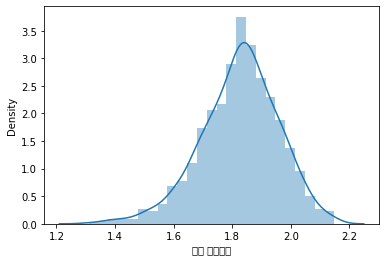

In [ ]:
df["평균 구매주기"] = np.log1p(df["평균 구매주기"]) #로그를 적용하는 이유? 분포를 고정해준다
sns.distplot(df["평균 구매주기"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder #'OneHotEncoder'-> 집단별로 쪼개서 0,1로 만들어 줌(=인코딩 해줌)

num = ["총매출액", "1회 평균매출액", "할인권 사용 횟수", "총 할인 금액", "구매카테고리수", "Frequency", "Monetary"] #num: 숫자형 변수들 -> scaler 적용 (standardscaler)
cg = ["구매금액대", "고객등급", "구매유형", "클레임접수여부", "거주지역", "성별", "고객 나이대"] 
#cg: 범주형(카테고리컬) 변수들 -> 카테고리가 숫자로 나타나져있어서 실제로 정수를 의미하는것이 아니지만 컴퓨터에서는 정수로 인식 -> 'OneHotEncoder'를 통해 정수로 인식하지 않도록 해주어야함.

X = df[df.이탈여부 == 0][num+cg]
Y = df[df.이탈여부 == 0]["평균 구매주기"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[-0.42215576 -0.59782402  0.72324173  0.52150413  1.67181667 -0.24075719
  0.52402175  1.          0.          0.          1.          0.
  0.          0.          1.          0.          0.          1.
  0.          0.          0.          0.          1.          0.
  0.          1.          0.          0.          0.          1.
  0.          0.          0.        ]


In [ ]:
#선형회귀분석
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #회귀모형 판단할때 RMSE지표를 쓰기위해 가져옴
from math import sqrt #'sqrt'= 루트

lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train))) #train데이터로 부터 나온 Rsquare
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) #test데이터로 부터 나온 Rsquare(Test의 결정계수는 굳이 뽑을 필요 없음)

rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE : {:.3f}".format(rmse))

#결과값 
#RMSE=0.066 -> 예측이 거의 가깝게 됐다. 

predict value
 [1.94897538 1.85887849 1.85774841 2.01211083 1.7690635  1.92044321
 1.71208921 1.57551755 1.82834432 1.89066557 1.90345011 1.51742668
 1.67330322 1.85491883 1.92707709 1.79151514 1.81149225 1.88834709
 1.83464346 1.8475012  1.85336055 1.83088328 1.89433567 1.79553705
 1.72078804 1.85136257 1.88781936 1.62240202 1.67665047 1.86766817
 1.85672551 1.89972829 1.83938755 1.91275481 1.84817975 1.88246265
 1.82643469 1.88558207 1.86908753 2.04166025 1.8589554  1.69187405
 1.73623476 1.6653238  1.74423163 1.94083302 1.77000015 1.86480547
 1.83663944 1.90882811 1.85777479 1.96423121 1.71559036 1.73819077
 1.83619608 1.83990255 1.76849712 1.90468741 1.66144064 1.79687294
 1.80571963 1.76289673 1.68314151 1.87529121 1.74122179 1.87165635
 1.86624493 1.74825562 1.88290764 1.47789836 1.88956639 1.80287061
 1.83141166 1.73627245 1.61132561 1.92455123 1.87674771 1.83437018
 1.65239758 1.78482537 1.75088668 1.86330254 1.81918855 1.71755284
 1.8683891  1.81733695 1.7915955  1.87847441 1.

In [ ]:
#num = ["총매출액", "1회 평균매출액", "할인권 사용 횟수", "총 할인 금액", "구매카테고리수", "Frequency", "Monetary"] 
#=> scaler 적용 (standardscaler) -> scaling은 x의 갯수에 영향주지 않음. 

#cg = ["구매금액대", "고객등급", "구매유형", "클레임접수여부", "거주지역", "성별", "고객 나이대"] 
#=> onehotencoding을 하게되면 {x1-(1), x1-(2), ....,  x1-(n); n=집단의 수}들이 새로 생김. 

# y= 1.813(베타0) + (-0.024)총매출액 + (0.06)총매출액2 + ... + (0.046)총매출액

print("절편", np.round(lr.intercept_, 3)) 
print("가중치(beta)", np.round(lr.coef_, 3))

절편 1.813
가중치(beta) [-0.024  0.06  -0.003 -0.002  0.009 -0.057  0.002  0.045  0.    -0.045
  0.003 -0.003  0.009  0.006  0.    -0.016 -0.015  0.015  0.067 -0.024
 -0.012 -0.027 -0.    -0.008  0.005 -0.007  0.007 -0.071  0.002  0.013
  0.008  0.003  0.046]


In [ ]:
#전체데이터 불러오기, 결측값 제거
#범주데이터는 엑셀 내에서 한글->숫자로 변환했음
bd = pd.read_excel("/content/drive/MyDrive/230106_body_data_범주데이터수정.xlsx")
bd
bd.dropna(axis=0, inplace=True)
#X,Y 따로따로 dropna()하지말고 전체데이터에서 dropna()하고 시작하기. 따로따로하면 X,Y 행 수 달라짐🤬

In [ ]:
#결측값 제거 확인
bd.isnull().sum()

ⓞ_02_성별             0
ⓞ_06_나이_반올림         0
ⓞ_12_골격근량           0
ⓞ_13_체지방량           0
ⓞ_14_체수분            0
                   ..
①_129_발뒤꿈치너비        0
①_130_위팔둘레          0
①_131_팔꿈치둘레         0
①_132_손목둘레          0
①_133_머리위로뻗은주먹높이    0
Length: 148, dtype: int64

In [ ]:
bd.describe()

,ⓞ_02_성별,ⓞ_06_나이_반올림,ⓞ_12_골격근량,ⓞ_13_체지방량,ⓞ_14_체수분,ⓞ_15_단백질,ⓞ_16_무기질,ⓞ_17_BMI,ⓞ_18_체지방율,ⓞ_19_복부지방율,...,①_124_무릎아래둘레,①_125_장딴지둘레,①_126_종아리최소둘레,①_127_발목최대둘레,①_128_발목너비,①_129_발뒤꿈치너비,①_130_위팔둘레,①_131_팔꿈치둘레,①_132_손목둘레,①_133_머리위로뻗은주먹높이
count,3181.0,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,...,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,1.0,32.786545,21.183842,17.645112,28.749010,7.672902,2.764980,22.583166,30.500912,0.850173,...,329.423137,347.648224,208.037724,233.573090,48.828670,60.367494,263.805407,246.492927,146.693807,1850.907576
std,0.0,15.048434,3.296812,5.881946,3.930124,1.072525,2.632138,3.410798,6.616183,0.106210,...,21.390297,26.454110,12.510467,12.480403,4.535244,3.997066,29.228780,19.569832,9.184684,70.998173
min,1.0,15.000000,3.200000,1.100000,2.900000,1.900000,-125.300000,14.808706,0.900000,0.700000,...,267.000000,273.000000,170.000000,196.000000,8.000000,36.000000,195.000000,199.000000,124.000000,1625.000000
25%,1.0,19.000000,19.300000,13.700000,26.400000,7.000000,2.500000,20.167084,26.400000,0.800000,...,315.000000,330.000000,200.000000,225.000000,46.000000,58.000000,244.000000,233.000000,140.000000,1803.000000
50%,1.0,30.000000,20.900000,17.000000,28.400000,7.600000,2.700000,22.116875,30.600000,0.800000,...,328.000000,345.000000,207.000000,233.000000,49.000000,60.000000,260.000000,244.000000,145.000000,1850.000000
75%,1.0,44.000000,22.700000,20.700000,30.600000,8.200000,2.900000,24.421096,34.300000,0.900000,...,342.000000,364.000000,215.000000,241.000000,52.000000,63.000000,280.000000,257.000000,152.000000,1898.000000
max,1.0,69.000000,101.800000,57.500000,130.000000,34.400000,44.000000,43.277877,152.000000,5.600000,...,443.000000,491.000000,271.000000,345.000000,65.000000,80.000000,425.000000,371.000000,192.000000,2157.000000


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2 

#데이터(변수) 지정
#y= bmi지수 / x= 'bmi지수(y), 키, 몸무게' 제외한 변수들
X = bd.drop(["ⓞ_17_BMI","①_003_키", "①_031_몸무게"], axis=1) 
Y = bd["ⓞ_17_BMI"]


In [ ]:
#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#일변량 통계기반
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p-value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"] == True]

#여기서 True가 나온 변수들을 X값으로 대입

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Chi2,p-value,support,attribute
6,34.445432,2.932552e-31,True,ⓞ_16_무기질
16,25.956213,4.132212e-28,True,①_004_눈높이
17,21.205422,6.997193e-26,True,①_005_목뒤높이
18,17.837833,5.424608e-24,True,①_006_어깨높이
19,21.188711,7.137987e-26,True,①_007_어깨가쪽높이
20,15.220468,2.827920e-22,True,①_008_겨드랑높이
21,8.469902,4.031410e-16,True,①_009_굽힌팔꿈치높이
57,7.697001,3.741583e-15,True,①_046_배돌출점기준엉덩이둘레
63,14.320180,1.277730e-21,True,①_052_총길이
132,7.166672,1.933535e-14,True,①_121_넙다리둘레


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9438 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9438 missing from current font.
  font.set_text(s, 0, flags=flags)


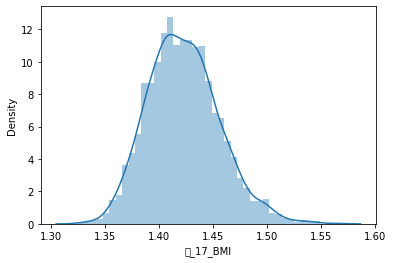

In [ ]:
#y("ⓞ_17_BMI")에 로그적용
bd["ⓞ_17_BMI"] = np.log1p(bd["ⓞ_17_BMI"])
sns.distplot(bd["ⓞ_17_BMI"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

#True값이 나온 변수들 리스트에 넣기
#연속형 변수들만 나옴 -> StandardScaler 적용
num = ["ⓞ_16_무기질", "①_004_눈높이", "①_005_목뒤높이", "①_006_어깨높이", "①_007_어깨가쪽높이", "①_008_겨드랑높이", "①_009_굽힌팔꿈치높이", "①_046_배돌출점기준엉덩이둘레", "①_052_총길이", "①_121_넙다리둘레"] 

X = bd[num]
Y = bd["ⓞ_17_BMI"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#표준화
ct = ColumnTransformer([('scling', StandardScaler(), num)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train)

[[-2.29605999e-01  3.67837789e-01  6.70283342e-02 ... -9.57428845e-01
  -2.98053025e-01 -9.43253866e-01]
 [-7.48435604e-02  3.31226704e-01  7.28733544e-01 ... -1.51554058e-01
   5.63715528e-01 -4.61375182e-01]
 [-2.29605999e-01 -2.91161743e-01 -2.16559613e-01 ... -6.55225800e-01
  -3.36353850e-01 -1.19566651e+00]
 ...
 [ 3.89443756e-01  1.66476821e-01  3.50616281e-01 ...  2.87047639e+00
   6.21166765e-01  3.02650863e+00]
 [-7.48435604e-02 -6.93883679e-01 -4.64068446e-02 ...  3.52117684e-01
   3.72211405e-01  4.33542374e-01]
 [ 2.53765904e-03  9.32546507e-02  5.20769049e-01 ...  5.36797323e-01
   8.50971712e-01 -1.17176122e-01]]


In [ ]:
#선형회귀분석
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from math import sqrt 

lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train))) 
rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE : {:.3f}".format(rmse))

#결과값
#train R2 : 0.843 -> 모델이 평균의 84%정도의 정확도로 설명하고있다. 
#RMSE : 0.014 -> 실제값과 예측된 y의 오차가 0.014이다. (굉장히 작다)

predict value
 [1.43845399 1.43334193 1.41683424 1.45339472 1.39004551 1.47037871
 1.39904115 1.42889364 1.39942737 1.45302293 1.40331544 1.3834941
 1.46147752 1.39275298 1.4547367  1.43810967 1.41004715 1.37434244
 1.43186402 1.44123263 1.43477361 1.40809918 1.3758036  1.39076003
 1.44775113 1.42735618 1.4131308  1.39834701 1.4558337  1.41589099
 1.3667695  1.42885429 1.42358164 1.40950335 1.43058917 1.40242949
 1.47689497 1.41265334 1.45321323 1.4328617  1.42590881 1.42719824
 1.42919258 1.41341651 1.42710348 1.42670298 1.45695076 1.47170275
 1.41545152 1.49697571 1.40853868 1.43275413 1.39037909 1.42969823
 1.41161321 1.43556765 1.38916869 1.39525837 1.47845618 1.37738929
 1.41504873 1.39984482 1.3990867  1.40227508 1.41131988 1.45205219
 1.40049394 1.39268105 1.37192996 1.4251074  1.41522553 1.44441776
 1.44457957 1.46040824 1.40289806 1.41420982 1.43782721 1.37299803
 1.45069387 1.47267052 1.42415027 1.42258656 1.44329268 1.41449734
 1.39910483 1.47427002 1.43401692 1.42916661 1.4

In [ ]:
print("절편", np.round(lr.intercept_, 3)) 
print("가중치(beta)", np.round(lr.coef_, 3))

절편 1.423
가중치(beta) [ 0.001 -0.01  -0.006  0.003  0.022 -0.029  0.004  0.02   0.002  0.007]
